# Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

plt.rcParams['figure.figsize'] = [15, 8] # global var for pics size

# Import data

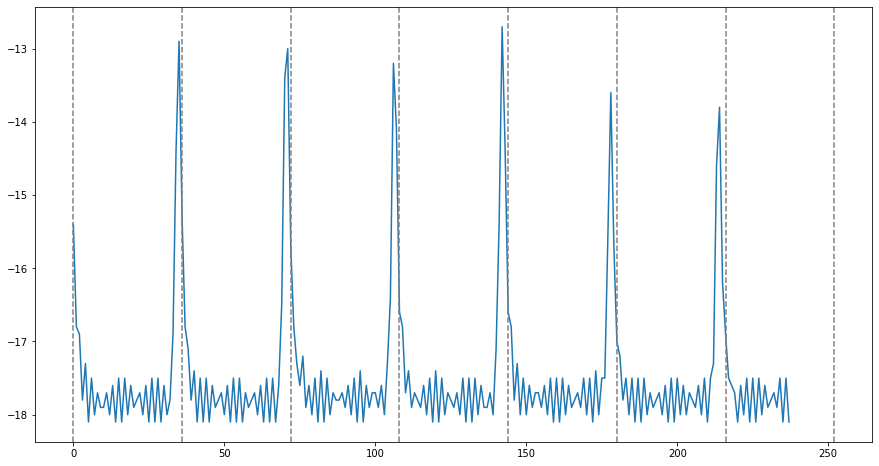

In [6]:
df = pd.read_csv('4peeks-short.csv')
plt.plot(df.Temperature)
for i in range(8):
    plt.axvline(0 + i*36, color='grey', linestyle='--')

34      NaN
70     36.0
106    36.0
142    36.0
178    36.0
213    35.0
Name: ind, dtype: float64

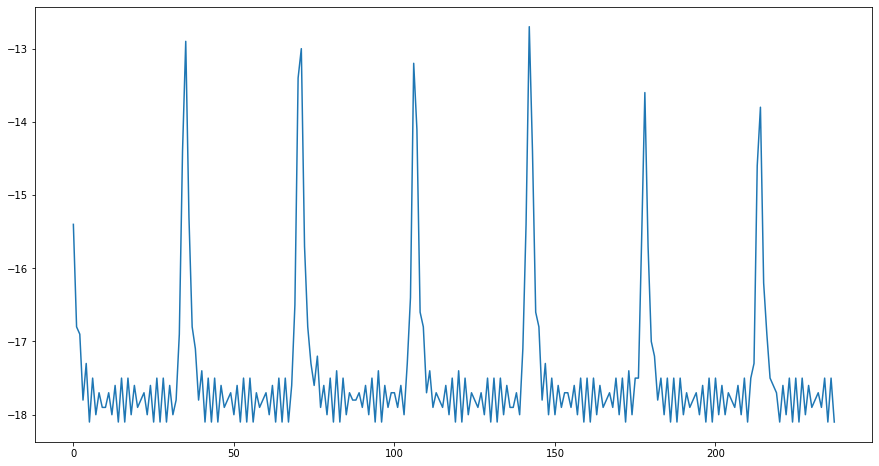

In [7]:
df['spike'] = df.Temperature.apply(lambda x: 1 if x>-15 else 0)
df['change'] = df['spike'].diff()
df['ind'] = df.index
plt.plot(df.Temperature)
df[df['change'] == 1]['ind'].diff()

# Get interval

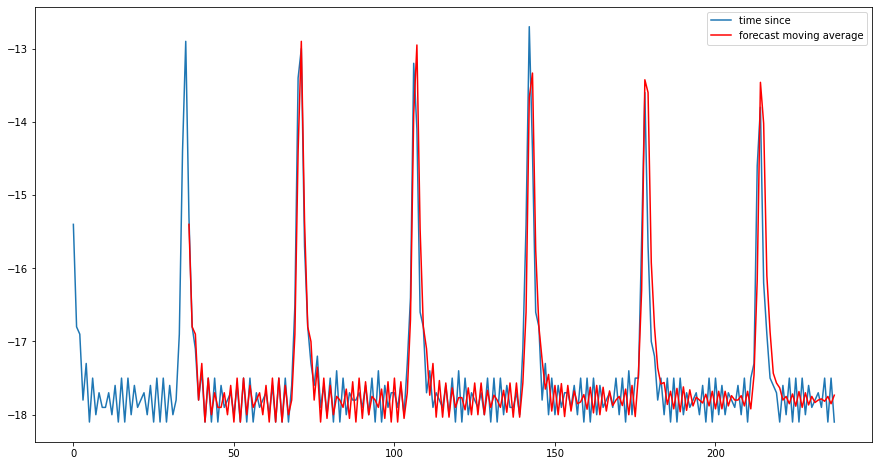

In [8]:
df['forecast'] = np.nan
for i in range(36, df.shape[0]):
    df.at[i, 'forecast'] = df.Temperature[range(i%36, i, 36)].mean()
    
plt.plot(df.Temperature)
plt.plot(df.forecast, color='red')
plt.legend(["time since", "forecast moving average"])
plt.show()   